# **Blurring**

Görüntüye düşük geçişli bir filtre (low passed filter) uygulanmasıyla elde edilir.

Noise gidermek için kullanılır.

Görüntüden parazit, kenarlar gibi yüksek frekanslı içeriği kaldırır.

OpenCV 3 tür bulanıklaştırma tekniği sunar:

*    Ortalama Bulanıklaştırma

*    Gaussian Bulanıklaştırma

*    Medyan Bulanıklaştırma

Bulanıklaştırmada görsel üzerinde bulunan detaylar azaltılır.

Detayların azaltılmasıyla birlikte noise de azaltılır.

**Ortalama Bulanıklaştırma**

Görüntü bir kutu filtresiyle sarılır.

Kutu filtresi denilen kavram; örneğin 5x5'lik bir matrisin görüntünün üzerinde sağa kayarak gezmesidir.

Bu filtre gezdiği kısımlardaki piksellerin ortalamasını alarak bu ortalama değeri matrisin merkezine yerleştirir.

Eğer filtrenin gezdiği piksellerde bir noise varsa bu yöntem ile kaldırılmış olur.

**Gaussian Bulanıklaştırma**

Bu yöntemde kutu filtresi yerine Gauss bulanıklaştırma kullanılır.

Pozitif ve tek olması gereken çekirdeğin genişliği ve yüksekliği belirtilir.

sigmaX, sigmaY, x ve y yönlerindeki standart sapma belirtilmelidir.

Böylelikle gauss kutusu oluşur.

Ortalama değer almak yerine gauss çekirdeğinin içerisinde bulunan değerlere göre işlemler gerçekleştirilir.

**Median Bulanıklaştırma**

Kutu filtresi görüntü üzerinde gezerek piksellerin median değerini alır ve matrisin merkezini bu değer ile değiştirir.

Örneğin görüntünün üzerinde gezen 3x3'lük bir filtre düzleştirildiğinde 1x9'luk bir vektör elde edilir.

Bu vektörde piksel değerleri sıralandığında ortasındaki değer, median blur'da kullanılan değerdir.

Bu değer 3x3'lük matrisin merkezindeki pikselin genliğine yazılır.

Bu yöntem **tuz ve biber gürültüsüne karşı oldukça etkilidir.**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#blurring -> detayı azaltır ve gürültüyü engeller

In [ ]:
#read image
img = cv2.imread(r"C:\Users\ilhan\Desktop\NYC.jpg")

In [ ]:
#converting image bgr format to rgb format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

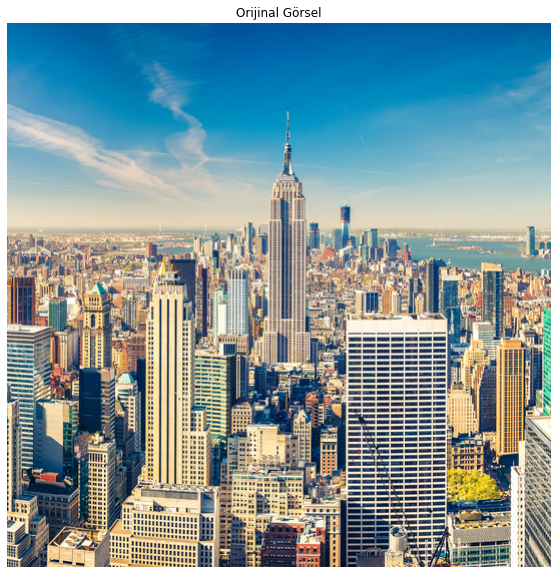

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis("off")
plt.title("Orijinal Görsel")
plt.show()

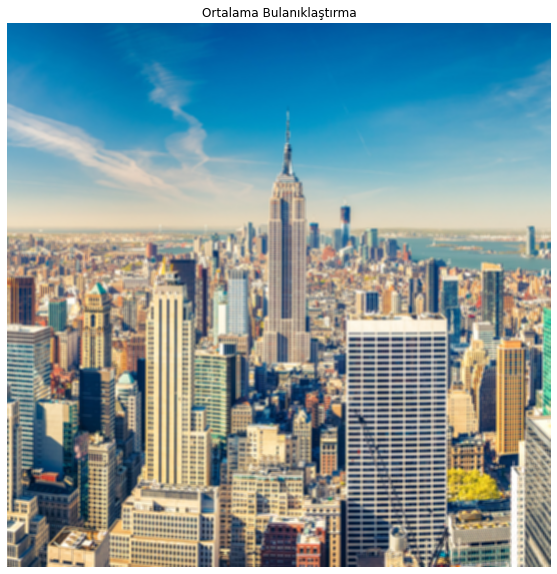

In [ ]:
"""
ortalama bulanıklaştırma

"""

dst2 = cv2.blur(img, ksize = (3,3))
#opencv'de çıktılar dst, girdiler src olarak adlandırılır.
#ksize parametresi ile görüntüde gezecek filtrenin boyutu belirlenir.

plt.figure(figsize = (10,10))
plt.imshow(dst2)
plt.axis("off")
plt.title("Ortalama Bulanıklaştırma")
plt.show()

Görsele bakıldığında detayların azaldığı net bir şekilde gözükmektedir.

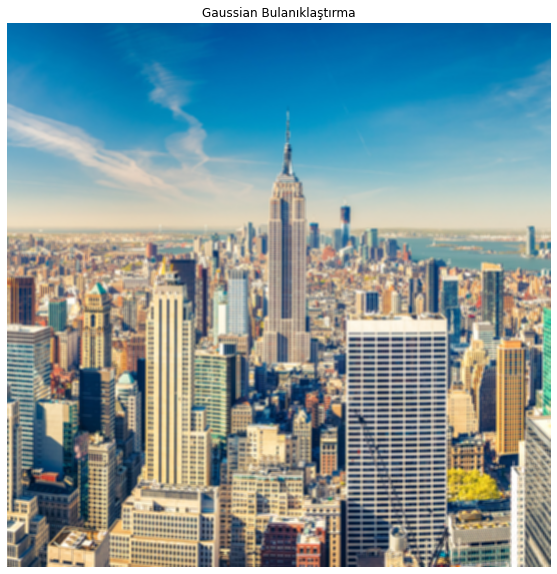

In [ ]:
"""
Gaussian bulanıklaştırma

"""

gb = cv2.GaussianBlur(img, ksize = (3,3), sigmaX = 7)
#eğer y yönündeki sigma yazılmazsa, sigmaY default olarak sigmaX'e eşit olur.

plt.figure(figsize = (10,10))
plt.imshow(gb)
plt.axis("off")
plt.title("Gaussian Bulanıklaştırma")
plt.show()

Orijinal görsele göre bulanıklaştırılmış olup, gözle ayırt edilemeyen hatalar varsa ayrıştırılmıştır.

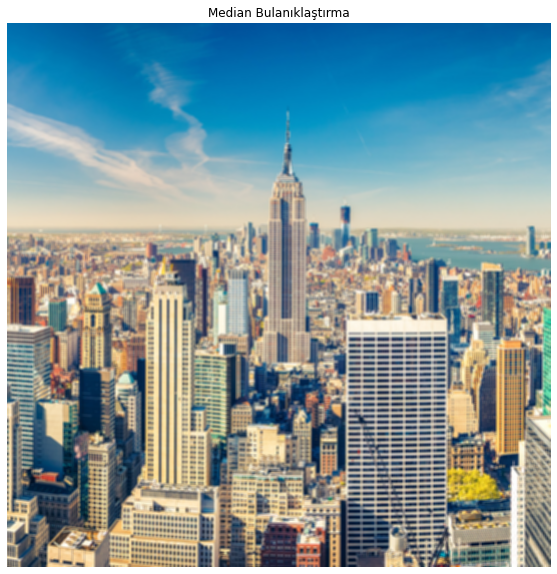

In [ ]:
"""
Median bulanıklaştırma

"""

mb = cv2.medianBlur(img, ksize = 3)

plt.figure(figsize = (10,10))
plt.imshow(gb)
plt.axis("off")
plt.title("Median Bulanıklaştırma")
plt.show()

Bu yöntem ile de detayların azaldığı görülmektedir.

Filtrelerin işe yaradığının gözükmesi için görüntüye gaussian noise eklenir.

In [ ]:
def gaussianNoise (image):
    row, column, channel = image.shape
    mean = 0
    variance = 0.05
    sigma = variance**0.5
    
    gauss = np.random.normal(mean, sigma, (row, column, channel))
    gauss = gauss.reshape(row, column, channel)
    noisy = img + gauss
    
    return noisy

In [ ]:
#read image
img = cv2.imread(r"C:\Users\ilhan\Desktop\NYC.jpg")

In [ ]:
#converting image bgr format to rgb format and normalize pixel
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255

Noise eklenebilmesi için görüntünün pikselleri 0-1 arasında normalize edilmiş halde bulunmalıdır.

Çünkü oluşturulan noise 0-1 arasındadır.

Piksel değerleri 255'e bölünürse 255/255=1 maksimum sınır 1 olur.

0/255=0 minimum sınır 0 olmuş olur.

In [ ]:
#adding noise to image
gaussian_noisy_img = gaussianNoise(img)

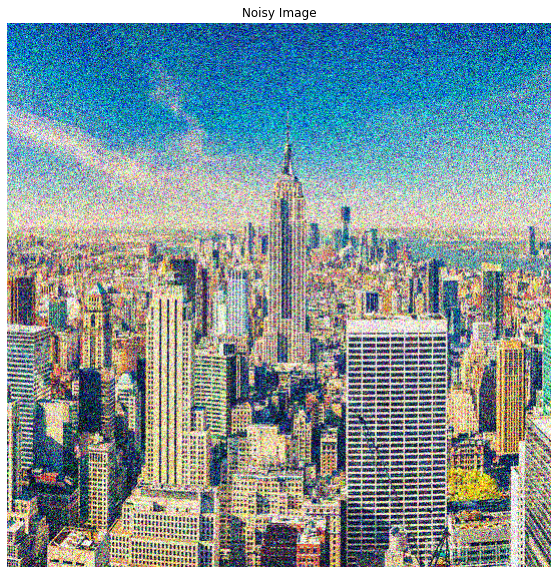

In [ ]:
plt.figure(figsize = (10,10))
gaussian_noisy_img = np.clip(gaussian_noisy_img, 0, 1)
plt.imshow(gaussian_noisy_img)
plt.axis("off")
plt.title("Noisy Image")
plt.show()

Noise eklenmiş görsel elde edilmiştir.

Görüntüde bulunan noise ışıktan, kameranın donanımsal özelliklerinden, hareketli bir ortamdan kaynaklanıyor olabilir.

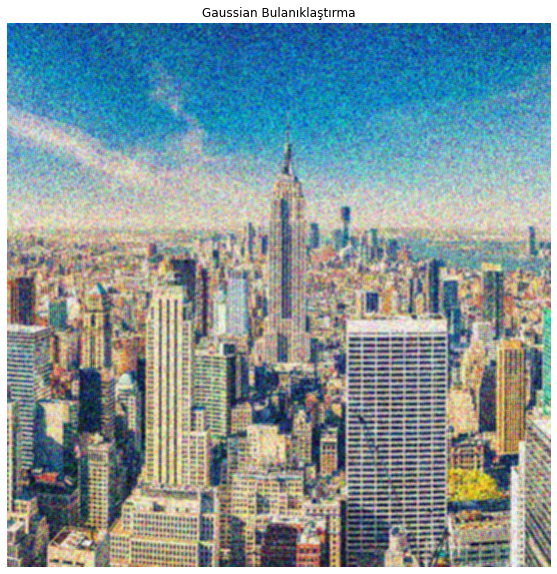

In [ ]:
#gaussian blur
gb1 = cv2.GaussianBlur(gaussian_noisy_img, ksize = (3,3), sigmaX = 7)
#eğer y yönündeki sigma yazılmazsa, sigmaY default olarak sigmaX'e eşit olur.

plt.figure(figsize = (10,10))
plt.imshow(gb1)
plt.axis("off")
plt.title("Gaussian Bulanıklaştırma")
plt.show()

Gaussian Noise ile görüntüde bulunan noise azaltılmıştır.

Noise azaltılırken aynı zamanda görüntüde bulunan detaylar da azalmıştır.

Burada bir trade off söz konusudur.

Görüntüye tuz biber gürültüsü eklenip, median blur ile kaldırılacaktır.

Tuz biber gürültüsü görüntü üzerine siyah beyaz noktaların rastgele bir şekilde yerleştirilmesidir.

Tuzun rengi beyaz, karabiberin rengi siyaha yakın olduğu için böyle bir isim verilmiştir.

In [ ]:
def salt_pepper_noise(image):
    
    row, column, channel = image.shape
    salt_vs_pepper = 0.6 #tuz biber oranı
    amount = 0.000005
    noisy = np.copy(image)
    
    #salt (beyaz noktalar)
    
    num_salt = np.ceil(amount * image.size * salt_vs_pepper) 
    #ceil methodu aşağı-yukarı yuvarlama yapmak için kullanılır.
    #input 1.1 ise ceil'a girdikten sonra 1 olur.
    #input 1.9 ise ceil'a girdikten sonra 2 olur.
    #image size görüntüde bulunan piksel sayısıdır.
    #amount değiştirilerek beyaz nokta sayısı değiştirilebilir.
    
    coordinates = [np.random.randint(0,i-1, int(num_salt)) for i in image.shape]
    #beyaz noktaların ekleneceği yerler random bir şekilde belirlenecektir.
    #koordinatlar piksellerdir ve pikseller integer olduğu için rastgele integer değerler belirlenir.
    #1. piksel 0. indekste olduğundan i-1'de biter.
    
    noisy[coordinates] = 1 #1 -> beyazın karşılığı
    
    #pepper (siyah)
    
    num_pepper = np.ceil(amount * image.size * (1 - salt_vs_pepper))
    #1 çıkarılmasının sebebi tuz biber bir oran olduğu için tuzda kullanılan değerden 1 çıkarıldığında oran 1'e tamamlanır.
    
    coordinates = [np.random.randint(0,i-1,int(num_pepper)) for i in image.shape]
    noisy[coordinates] = 0 #0 -> siyahın karşılığı
    
    return noisy

In [ ]:
salt_pepper_noise_img = salt_pepper_noise(img)

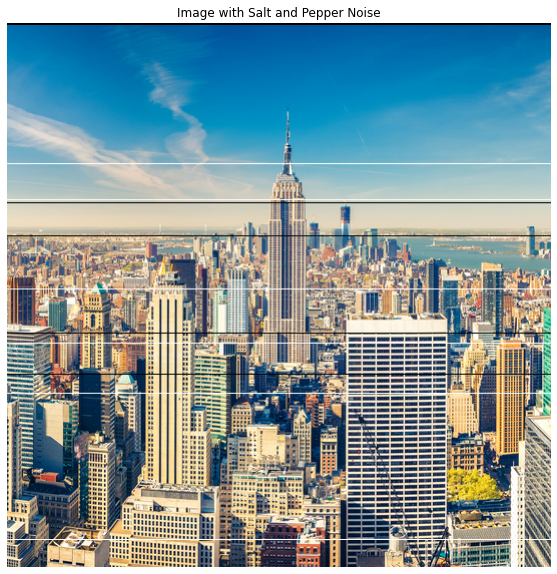

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(salt_pepper_noise_img)
plt.axis("off")
plt.title("Image with Salt and Pepper Noise")
plt.show()

In [ ]:
mb = cv2.medianBlur(salt_pepper_noise_img.astype(np.float32), ksize = 3)

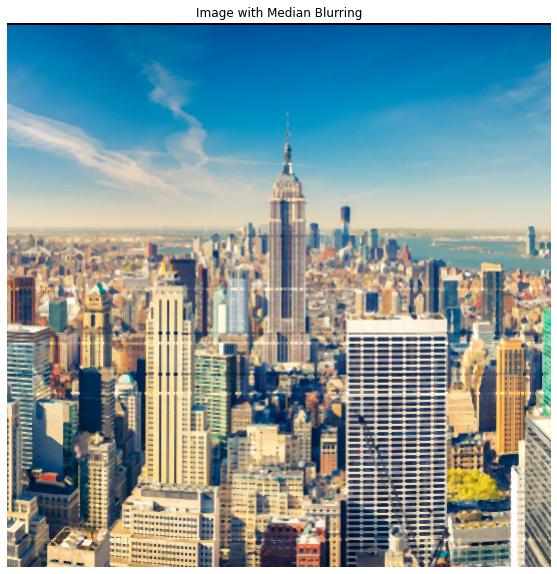

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(mb)
plt.axis("off")
plt.title("Image with Median Blurring")
plt.show()

Median blurring ile eklenen noise kaldırılmıştır.